# Descripción del Dataset ESC-50

El dataset **ESC-50** es un conjunto de datos de clasificación de sonidos ambientales que contiene 2,000 clips de audio de 5 segundos, organizados en 50 categorías balanceadas. Se usa comúnmente para tareas de clasificación de audio y reconocimiento de eventos sonoros.

## Tabla de Datos

| Columna   | Tipo de Dato | Descripción |
|-----------|-------------|-------------|
| `filename` | `object` | Nombre del archivo de sonido (formato .wav). |
| `fold` | `int64` | Número de fold asignado para validación cruzada (1-5). |
| `target` | `int64` | Etiqueta numérica de la categoría del sonido (0-49). |
| `category` | `object` | Nombre de la categoría de sonido (ej. "dog", "siren", "thunderstorm"). |
| `esc10` | `bool` | Indica si el sonido pertenece a la versión reducida ESC-10 (`True` o `False`). |
| `src_file` | `int64` | Identificador del archivo fuente original del sonido. |
| `take` | `object` | Versión de la grabación de un mismo sonido (ej. "A", "B"). |

## Observaciones Clave

- El dataset está balanceado con aproximadamente la misma cantidad de muestras por categoría.
- Se divide en **5 folds** para facilitar validación cruzada.
- Algunas categorías incluyen sonidos relevantes para el proyecto, como **bocinas, sirenas o ruidos de tráfico**.
- No hay una correlación fuerte entre las variables numéricas (`fold`, `target`, `src_file`).
- La distribución de sonidos por `fold` es uniforme, lo que evita sesgos en la validación del modelo.

Este dataset puede ser utilizado para entrenar un modelo de **detección de sonidos críticos para conductores con discapacidad auditiva** mediante técnicas de aprendizaje profundo, como redes neuronales convolucionales (CNNs) aplicadas a espectrogramas de audio.

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "datasets/ESC-50/meta/esc50.csv"
df = pd.read_csv(file_path)

In [5]:
print("\nInformación General del Dataset")
print(df.info())


Información General del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
None


In [6]:
print("\nPrimeras Filas del Dataset")
print(df.head())


Primeras Filas del Dataset
            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


In [13]:
# Definir sonidos críticos en la conducción
critical_sounds = [
    "siren",  # Sirenas de emergencia
    "car_horn",  # Bocina de automóvil
    "engine",  # Sonido del motor
    "brakes_squeaking",  # Frenos chirriando
    "jackhammer",  # Ruido fuerte de construcción
    "train",  # Tren (puede ser relevante en cruces ferroviarios)
    "fireworks",  # Explosiones fuertes (pueden distraer o asustar)
    "thunderstorm",  # Tormenta eléctrica (puede reducir visibilidad y generar distracción)
]

# Filtrar los datos con sonidos críticos
df_critical_sounds = df[df["category"].isin(critical_sounds)]
df_critical_sounds.head()

,filename,fold,target,category,esc10,src_file,take
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
16,1-115521-A-19.wav,1,19,thunderstorm,False,115521,A
17,1-115545-A-48.wav,1,48,fireworks,False,115545,A
18,1-115545-B-48.wav,1,48,fireworks,False,115545,B


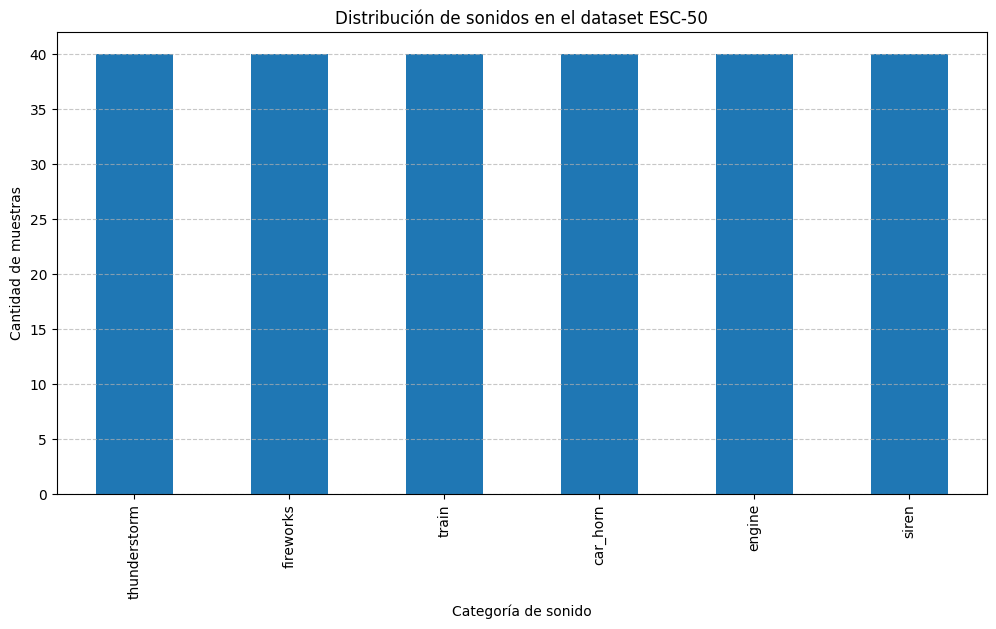

In [14]:
plt.figure(figsize=(12, 6))
df_critical_sounds["category"].value_counts().plot(kind="bar")
plt.title("Distribución de sonidos en el dataset ESC-50")
plt.xlabel("Categoría de sonido")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

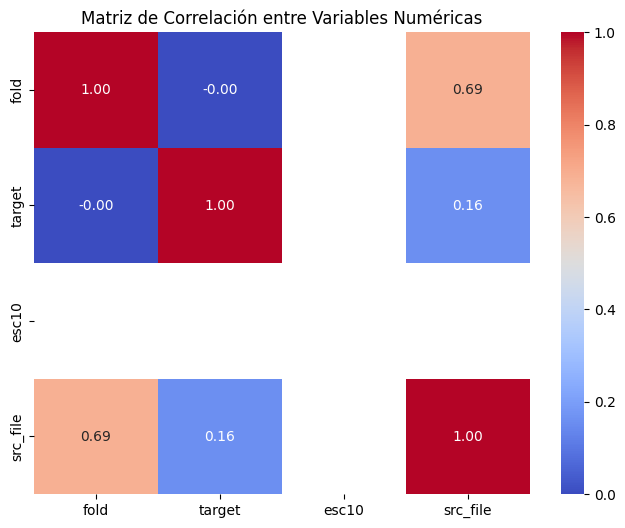

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_critical_sounds.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

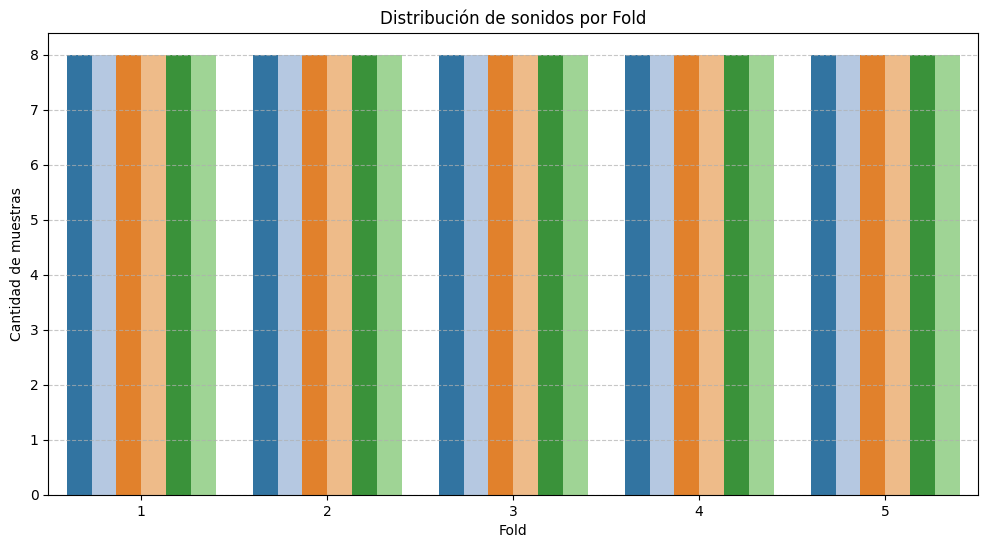

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_critical_sounds, x="fold", hue="category", palette="tab20")
plt.title("Distribución de sonidos por Fold")
plt.xlabel("Fold")
plt.ylabel("Cantidad de muestras")
plt.legend([],[], frameon=False)  # Ocultar leyenda para claridad
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [17]:
descriptive_stats = df_critical_sounds.describe()
print("\nEstadísticas Descriptivas")
print(descriptive_stats)


Estadísticas Descriptivas
             fold      target       src_file
count  240.000000  240.000000     240.000000
mean     3.000000   40.166667  124986.233333
std      1.417169    9.671018   57070.091619
min      1.000000   19.000000   17124.000000
25%      2.000000   42.000000   78196.000000
50%      3.000000   43.500000  122067.000000
75%      4.000000   45.000000  165793.500000
max      5.000000   48.000000  262579.000000
